### **REGRESSION MODELS**
by J. Daniel Velez

Here different regression models are tested

In [1]:
from f_filter_process import get_file, call_file, export_dataframe
from regression_models import*
import pandas as pd
import geopandas as gpd

In [2]:
# Function to import files
River_dict = call_file() 

2024-11-11 11:59:30.079 python[47370:1825515] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-11 11:59:30.667 python[47370:1825515] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


##### Linear Regression
Args for the 'l_regression' function:
 * river (dict): Dictionary containing node data with 'width' and 'wse' keys.
 * min_spearman (float or None): Minimum Spearman correlation value to include a node in the plot.
                                 if None, no filtering is applied (default: None).
 * min_obs (int): Minimum number of observations required to display a scatter plot for a node (default: 10).
 * show_p_value (bool): If True, displays the p-value on each scatter plot (default: True).

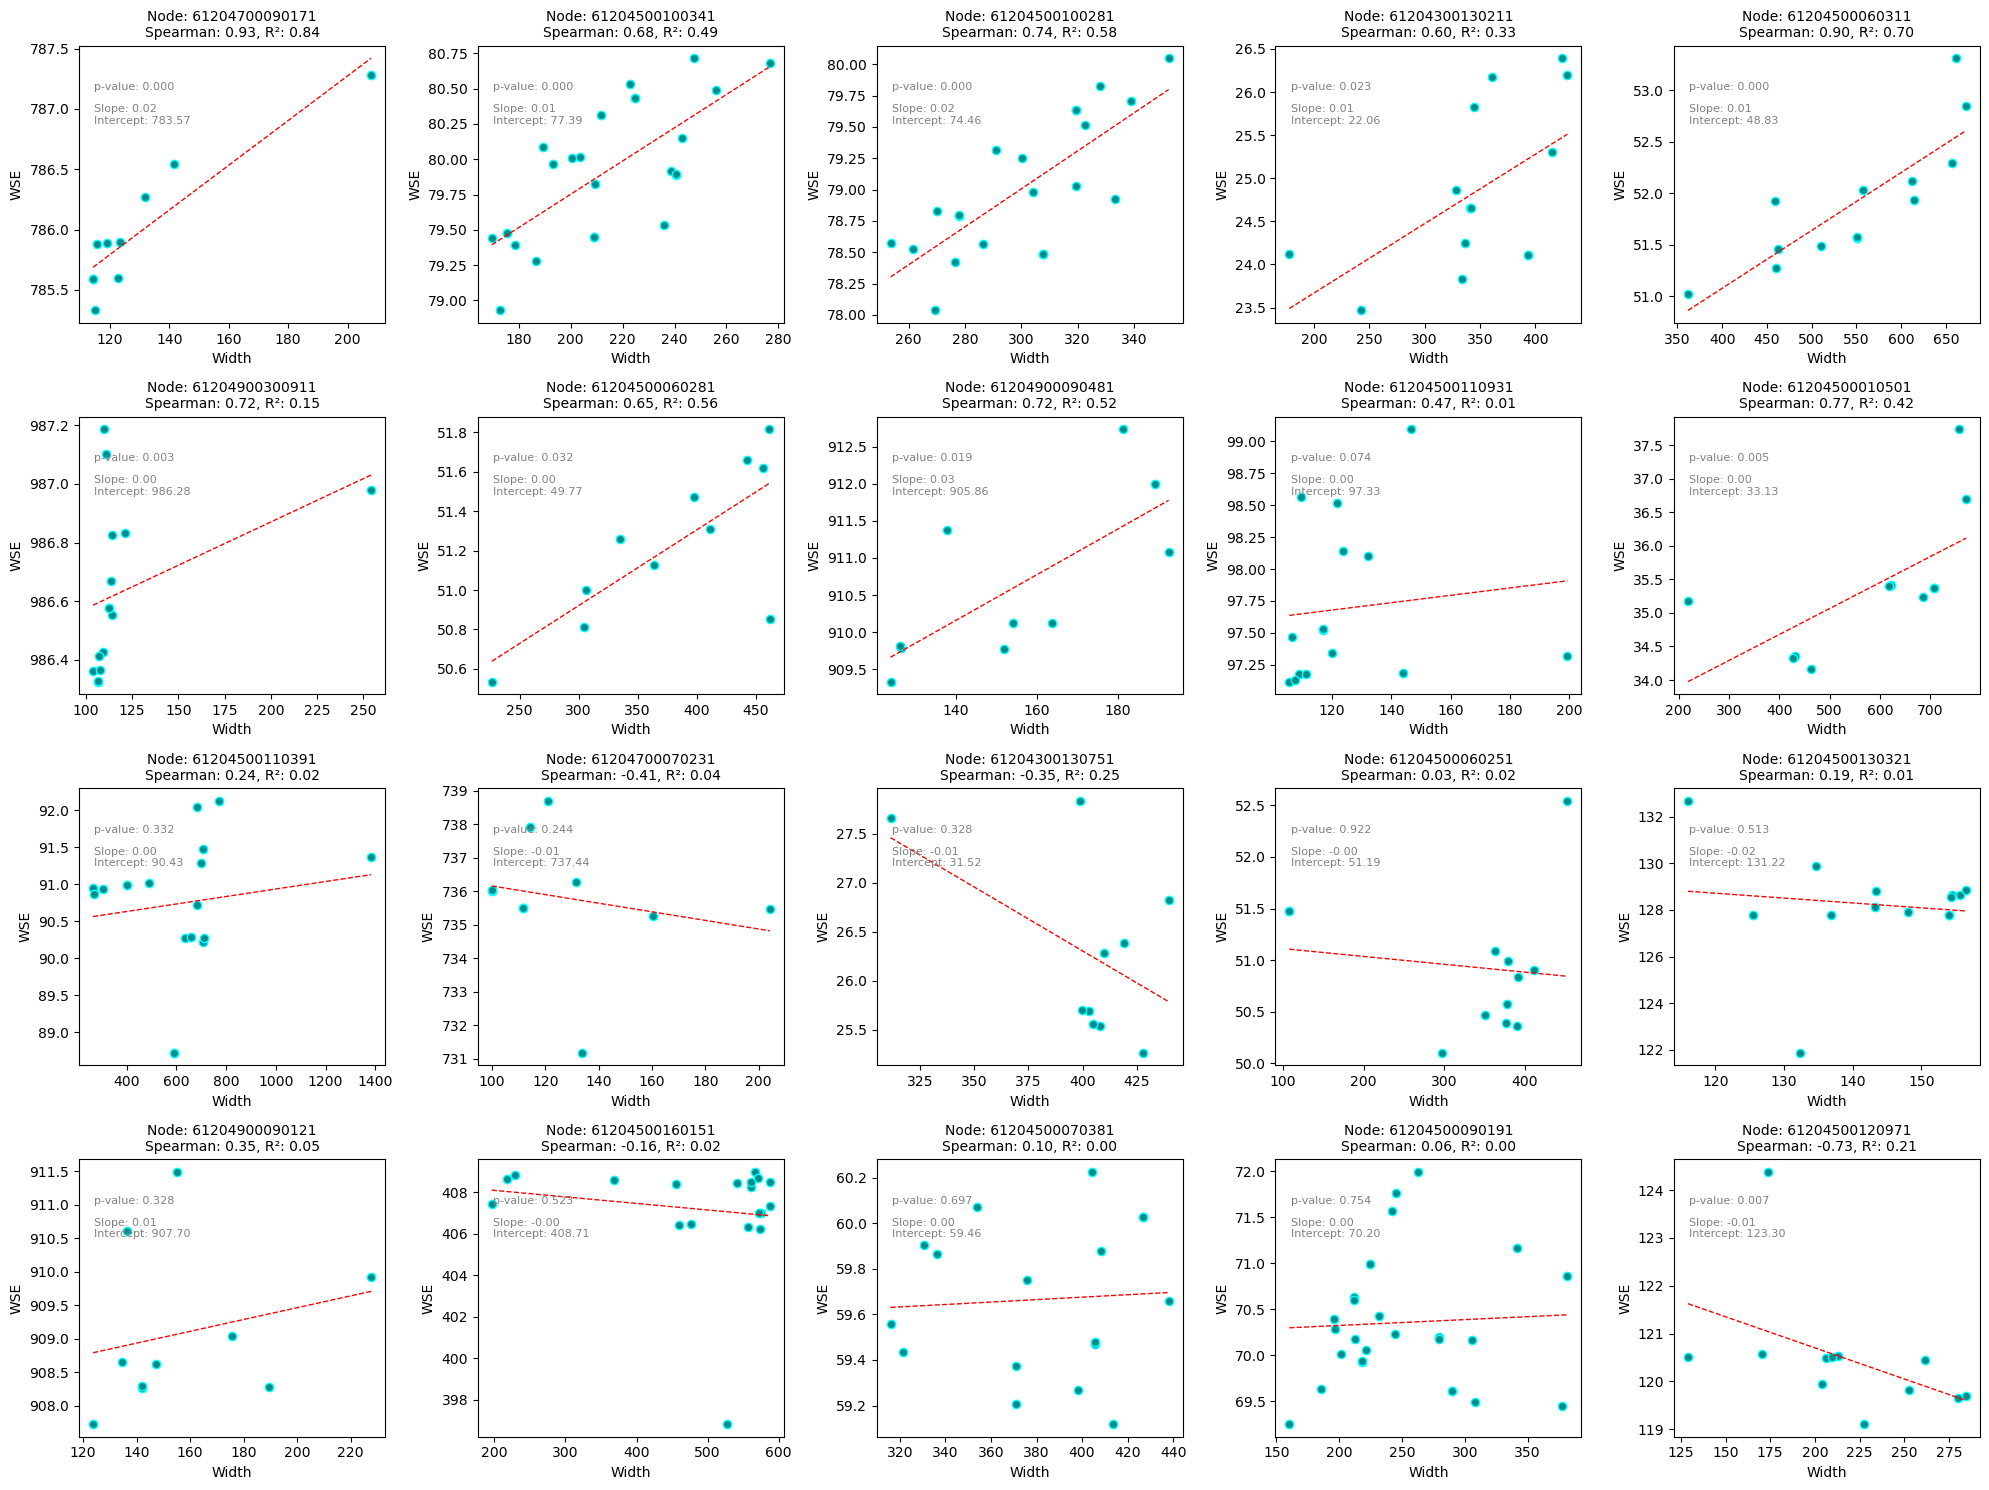

In [3]:
################## 1. Linear Regression ##################
linear_reg = l_regression(River_dict, min_spearman=None, min_obs=10, show_p_value=True)

In [4]:
linear_reg.rename(columns={'Node': 'node_id','Spearman': 'spearman_corr'}, inplace=True)
linear_reg

,node_id,spearman_corr,p_value,R2,Slope,Intercept
0,61204900310151,-0.085366,0.814617,0.105007,0.008987,989.479184
1,61204900310211,0.031579,0.922389,0.070106,-0.020956,994.255616
2,61204900310231,0.585276,0.013580,0.315171,0.028139,989.079003
3,61204900310241,0.537998,0.014411,0.261908,0.010913,991.080248
4,61204900310251,-0.117769,0.641642,0.004254,-0.002264,993.725857
...,...,...,...,...,...,...
1310,61204500010461,0.608791,0.020857,0.455187,0.006955,32.762858
1311,61204500010471,0.186791,0.457989,0.050501,0.002165,34.337337
1312,61204500010481,0.275188,0.240283,0.103409,0.001960,34.246270
1313,61204500010491,0.692308,0.008730,0.545061,0.005616,32.470459


In [ ]:
export_dataframe(linear_reg,is_geodataframe=False)

In [5]:
river_gpkg = call_file()

In [6]:
## Define the common column used for merging, e.g., "id" (replace "id" with your actual column name)
common_column = "node_id"
#Merge the geodataframe with the dataframe
l_regression = river_gpkg.merge(linear_reg, on=common_column).T.drop_duplicates().T # Drop duplicate columns

In [7]:
#l_regression['geometry'] = gpd.GeoSeries.from_wkt(l_regression['geometry'])
l_regression = gpd.GeoDataFrame(l_regression, geometry='geometry', crs="EPSG:4326")
l_regression

,node_id,time_str,lat,lon,river_name,wse,wse_u,width,width_u,node_dist,...,p_width,p_wid_var,p_dist_out,spearman_corr_x,p_value_x,num_pairs,geometry,R2,Slope,Intercept
0,61204900310151,2024-08-20T21:25:24Z,3.078762,-76.647629,Cauca,990.32464,0.10041,108.146894,5.313675,25.951399,...,63.0,105.84,1468250.0,-0.085366,0.814617,10,POINT (-76.64763 3.07876),0.105007,0.008987,989.479184
1,61204900310151,2024-03-06T23:24:49Z,3.078815,-76.647592,Cauca,990.32977,0.09908,119.353508,7.235884,26.560645,...,63.0,105.84,1468250.0,-0.085366,0.814617,10,POINT (-76.64759 3.07881),0.105007,0.008987,989.479184
2,61204900310151,2024-07-31T00:40:20Z,3.078749,-76.647656,Cauca,990.52487,0.09882,100.716627,5.185727,22.419266,...,63.0,105.84,1468250.0,-0.085366,0.814617,10,POINT (-76.64766 3.07875),0.105007,0.008987,989.479184
3,61204900310151,2023-08-11T07:54:00Z,3.078806,-76.647581,Cauca,990.17154,0.1015,128.307815,6.8269,28.573594,...,63.0,105.84,1468250.0,-0.085366,0.814617,10,POINT (-76.64758 3.07881),0.105007,0.008987,989.479184
4,61204900310151,2024-09-10T18:10:30Z,3.07881,-76.647613,Cauca,990.22068,0.10102,101.148474,4.968549,23.341699,...,63.0,105.84,1468250.0,-0.085366,0.814617,10,POINT (-76.64761 3.07881),0.105007,0.008987,989.479184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,61204500010501,2024-05-18T12:03:48Z,8.069668,-74.826339,no_data,36.69224,0.09142,771.25583,13.749986,324.607784,...,381.0,70.56,475012.0,0.772727,0.005299,11,POINT (-74.82634 8.06967),0.415945,0.003872,33.129784
20108,61204500010501,2024-08-24T08:32:22Z,8.0681,-74.827722,no_data,35.17707,0.10304,218.670097,4.734999,82.729173,...,381.0,70.56,475012.0,0.772727,0.005299,11,POINT (-74.82772 8.06810),0.415945,0.003872,33.129784
20109,61204500010501,2024-08-30T19:49:11Z,8.069652,-74.8264,no_data,35.24072,0.09106,685.42541,14.013711,322.184253,...,381.0,70.56,475012.0,0.772727,0.005299,11,POINT (-74.82640 8.06965),0.415945,0.003872,33.129784
20110,61204500010501,2023-12-03T14:03:10Z,8.069727,-74.826384,no_data,35.36747,0.09167,708.277144,13.217425,325.837703,...,381.0,70.56,475012.0,0.772727,0.005299,11,POINT (-74.82638 8.06973),0.415945,0.003872,33.129784


In [8]:
export_dataframe(l_regression,is_geodataframe=True)

2024-11-11 12:00:33.956 python[47370:1825515] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'
2024-11-11 12:00:34.116 python[47370:1825515] +[IMKInputSession subclass]: chose IMKInputSession_Modern


GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Cauca/Shps/No_Nomr/8_bits/dark_f_030/All_rho/Reg_Cau_N_8030≥10.gpkg
